In [17]:
import numpy as np
import imageio
import matplotlib.pyplot as plt

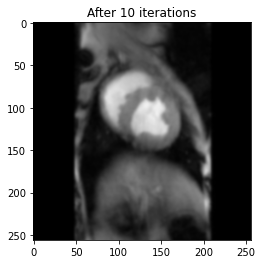

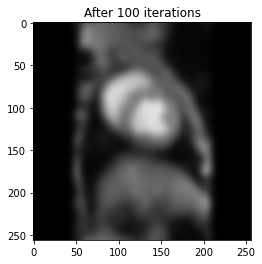

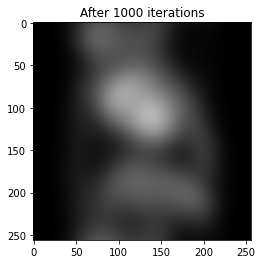

In [18]:
def smooth_image(image, dt, n):
    height, width, _ = image.shape

    # Create a copy of the image to hold the updates
    updated_image = image.copy()

    for _ in range(n):
        # Calculate second derivatives
        d2x = (np.roll(image, -1, axis=1) - 2 * image + np.roll(image, 1, axis=1))
        d2y = (np.roll(image, -1, axis=0) - 2 * image + np.roll(image, 1, axis=0))

        # Update image using heat equation
        updated_image = image + dt * (d2x + d2y)

        # Replace original image with updated image
        image = updated_image.copy()

    return updated_image

# Load image
image = imageio.imread('heart.jpg').astype(float)

# Set parameters
dt = 0.1

# Smooth image and save outputs
for n in [10, 100, 1000]:
    smoothed = smooth_image(image, dt, n)
    output_file = f'smoothed_{n}.jpg'
    imageio.imsave(output_file, smoothed.astype(np.uint8))

    # Display the image
    plt.imshow(smoothed.astype(np.uint8))
    plt.title(f'After {n} iterations')
    plt.show()
